## Extension: Repetition Lag-CRP
The lag-CRP measures the probability of recalling an item at a particular lag **given the current recall position**, conditional on items that remain available for recall. Here we follow up on our previous repetition-robust implementation of the Lag-CRP analysis with a new implementation that allows us to calculate the **Repetition Lag-CRP**.

In this analysis, we compare transition probabilities from repeated items to items studied near either their first or second presentation (or additional presentations if there are more). This means:

1. We only tabulate lag-transitions from recalls of repeated items (though we still have to track available and actual transitions across trials to accomplish this).
2. We separately tabulate lag-transitions relative to each presentation of the repeated item, so that we can calculate the Lag-CRP for each presentation of the repeated item.

This analysis helps investigate whether transitions from repeated items during free recall are particularly likely to cluster around the first or later presentations of the repeated item, clarifying how item repetition affects the structure of episodic memory search.

In [1]:
import os

from jaxcmr.helpers import find_project_root, generate_trial_mask, load_data
from jaxcmr.repetition import make_control_dataset
import matplotlib.pyplot as plt
from jaxcmr.analyses.repcrp import plot_rep_crp


/Users/jordangunn/jaxcmr/.venv/lib/python3.12/site-packages/scipy/stats/_resampling.py:141: RuntimeWarning: invalid value encountered in subtract
  U_ji = [(n - 1) * (theta_hat_dot - theta_hat_i)
/Users/jordangunn/jaxcmr/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:440: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  return fun(*args, **kwargs)
/Users/jordangunn/jaxcmr/.venv/lib/python3.12/site-packages/scipy/stats/_resampling.py:141: RuntimeWarning: invalid value encountered in subtract
  U_ji = [(n - 1) * (theta_hat_dot - theta_hat_i)
/Users/jordangunn/jaxcmr/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:440: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  return fun(*args, **kwargs)


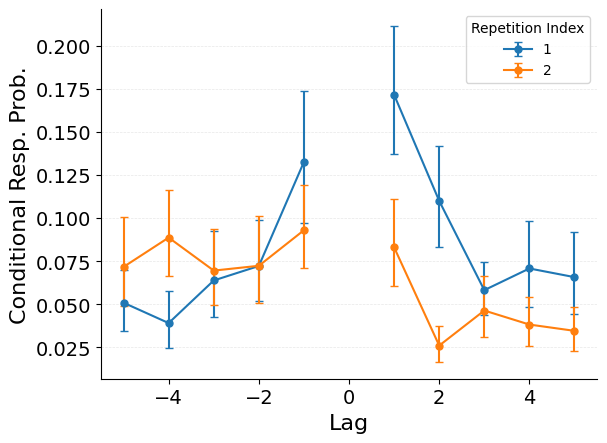

/Users/jordangunn/jaxcmr/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:440: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  return fun(*args, **kwargs)


<Axes: xlabel='Lag', ylabel='Conditional Resp. Prob.'>

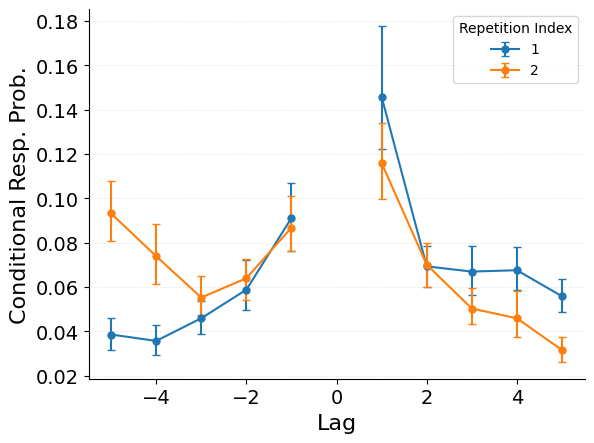

In [2]:
# parameters
run_tag = "RepCRP"
data_name = "LohnasKahana2014"
data_query = "data['list_type'] == 4"
ctrl_query = "data['list_type'] == 1"
data_path = os.path.join(find_project_root(), "data/RepeatedRecallsLohnasKahana2014.h5")

# set up data structures
data = load_data(data_path)
recalls = data["recalls"]
presentations = data["pres_itemnos"]
list_length = data["listLength"][0].item()
trial_mask = generate_trial_mask(data, data_query)

# plot
plot_rep_crp(
    data,
    generate_trial_mask(data, data_query),
    labels=["First", "Second"],
    contrast_name="Repetition Index",
)
plt.show()

control_dataset = make_control_dataset(data, data_query, ctrl_query, 10)
plot_rep_crp(
    control_dataset,
    generate_trial_mask(control_dataset, data_query),
    labels=["First", "Second"],
    contrast_name="Repetition Index",
)

# jit(repcrp, static_argnames=("size", "list_length"))(recalls[trial_mask], presentations[trial_mask], list_length)